In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import mcnemar_table, mcnemar
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/content/credit_risk_dataset.csv')
df.dropna(inplace=True)

# Show first few rows
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Data Visualization

**Box Plot**

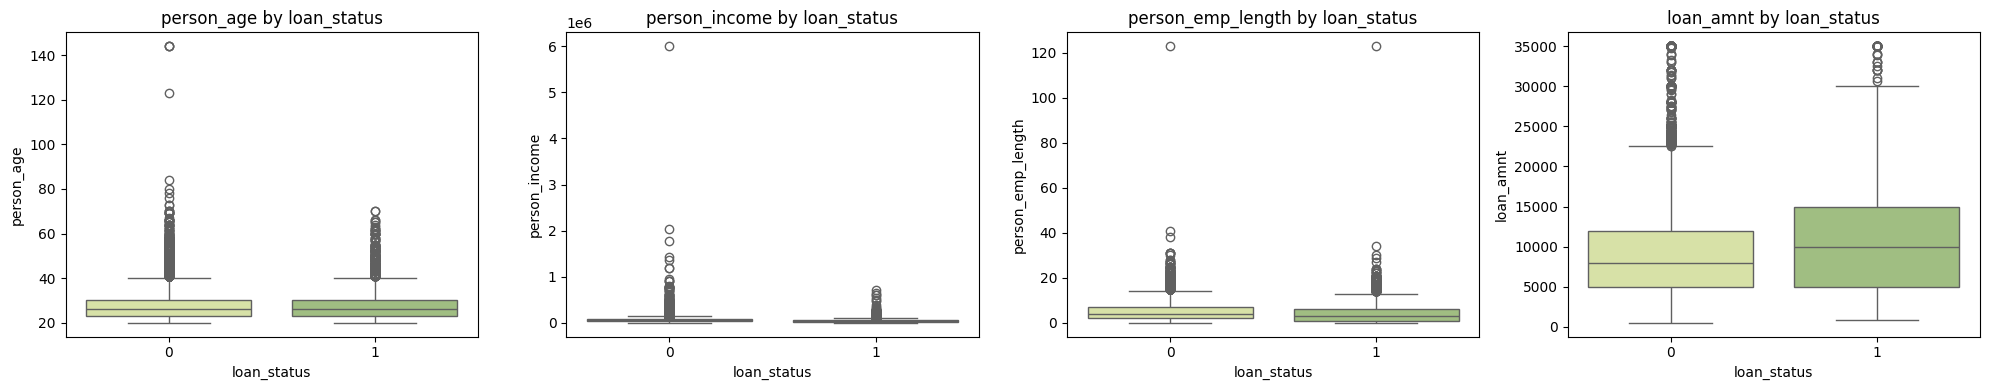

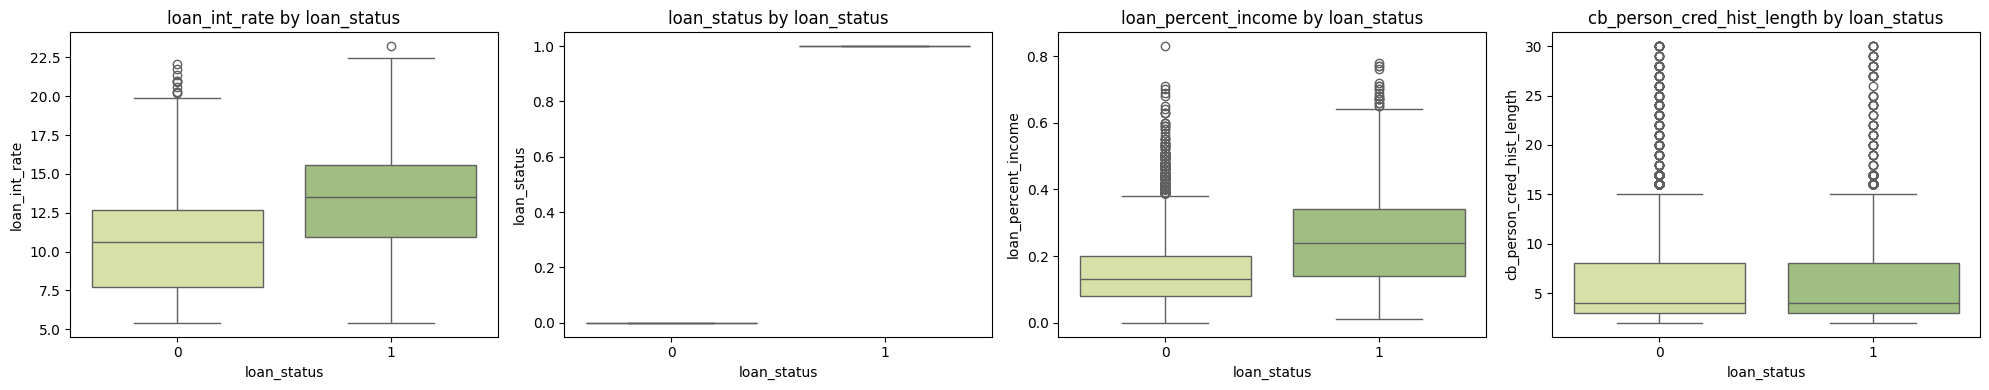

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for the two categories in loan_status
custom_palette = {"1": "#A0C878", "0": "#DDEB9D"}  # Blue and Orange

numeric_cols = df.select_dtypes(include='number').columns.tolist()

def plot_box_plots(df, columns, target='loan_status', per_page=4):
    total = len(columns)
    for i in range(0, total, per_page):
        subset = columns[i:i+per_page]
        fig, axs = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
        if len(subset) == 1:
            axs = [axs]
        for ax, col in zip(axs, subset):
            sns.boxplot(x=target, y=col, data=df, ax=ax, palette=custom_palette)
            ax.set_title(f'{col} by {target}')
        plt.tight_layout()
        plt.show()

plot_box_plots(df, numeric_cols)


**Violin Plot**

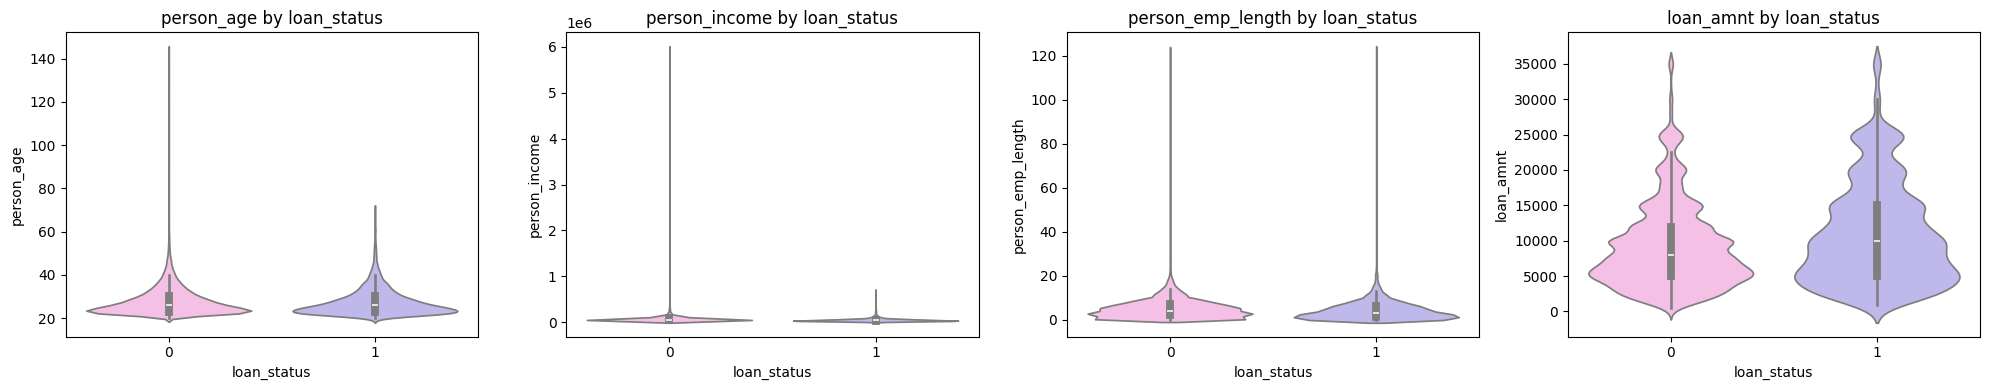

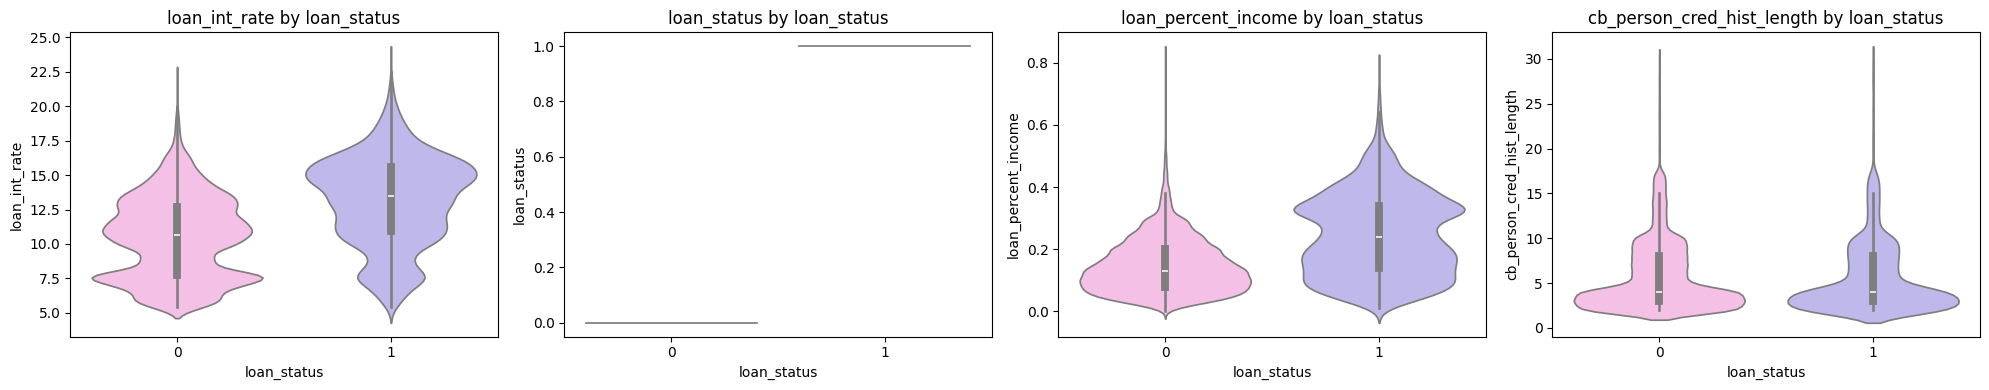

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for the two categories in loan_status
custom_palette = {"1": "#B7B1F2", "0": "#FDB7EA"}

def plot_violin_plots(df, columns, target='loan_status', per_page=4):
    total = len(columns)
    for i in range(0, total, per_page):
        subset = columns[i:i+per_page]
        fig, axs = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
        if len(subset) == 1:
            axs = [axs]
        for ax, col in zip(axs, subset):
            sns.violinplot(x=target, y=col, data=df, ax=ax, palette=custom_palette)
            ax.set_title(f'{col} by {target}')
        plt.tight_layout()
        plt.show()

plot_violin_plots(df, numeric_cols)


**Histogram**

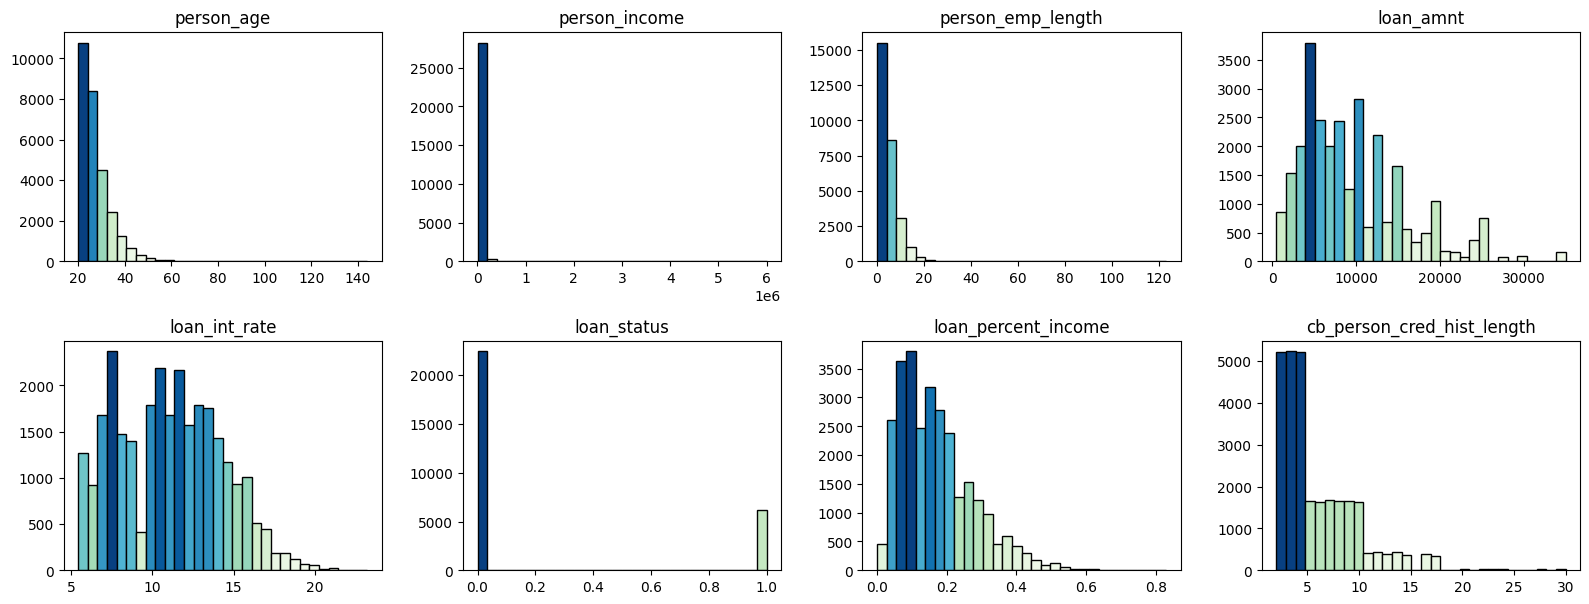

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

def plot_histograms(df, columns, cols_per_row=4):
    total = len(columns)
    rows = (total // cols_per_row) + 1
    plt.figure(figsize=(cols_per_row * 4, rows * 3))

    for i, col in enumerate(columns):
        plt.subplot(rows, cols_per_row, i + 1)
        values, bins = np.histogram(df[col].dropna(), bins=30)

        # Normalize values to [0, 1] for color mapping
        norm = Normalize(vmin=min(values), vmax=max(values))
        colors = cm.GnBu(norm(values))

        for j in range(len(values)):
            plt.bar(bins[j], values[j], width=bins[j+1] - bins[j],
                    color=colors[j], edgecolor='black', align='edge')

        plt.title(col)

    plt.tight_layout()
    plt.show()

plot_histograms(df, numeric_cols)


**Correlation Matrix**

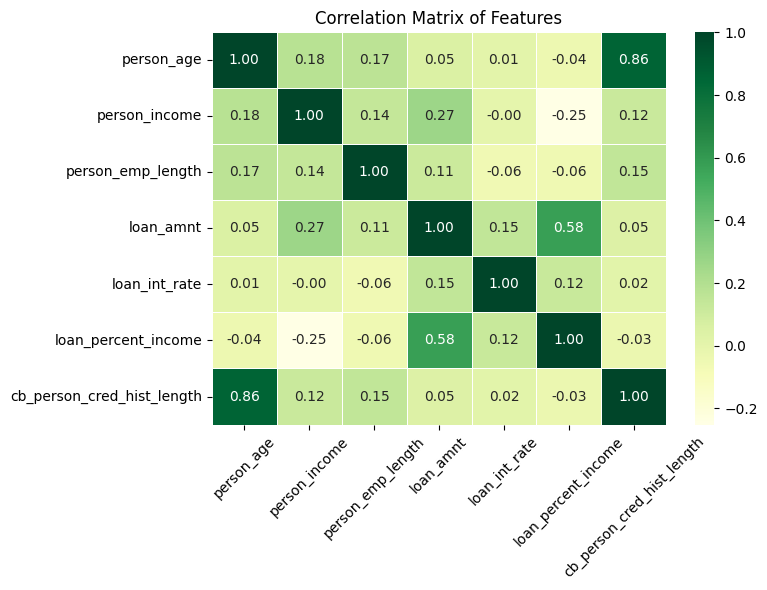

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the target column
df_corr = df.drop(columns=['loan_status'])
df_corr_numeric = df_corr.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_corr_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGn', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Apply SMOTE

In [ ]:
# Apply Label Encoding to categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col].astype(str))

# Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df = pd.DataFrame(scaled_features, columns=df.columns)

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.907594,-0.122674,0.919733,28.453433,0.849052,1.513456,4.003984,1.542164,1.901788,3.952527,2.147555,-0.691791
1,-1.066064,-0.914907,0.222612,0.050866,-0.885267,-0.194886,-1.367627,0.031008,-0.525821,-0.653141,-0.465646,-0.939413
2,-0.432183,-0.914907,-1.171629,-0.911932,0.270946,0.659285,-0.656678,0.566725,1.901788,3.764540,-0.465646,-0.691791
3,-0.749123,-0.018433,0.919733,-0.189833,0.270946,0.659285,4.003984,1.297530,1.901788,3.388567,-0.465646,-0.939413
4,-0.590653,-0.196445,0.919733,0.772966,0.270946,0.659285,4.003984,1.000253,1.901788,3.576554,2.147555,-0.444169


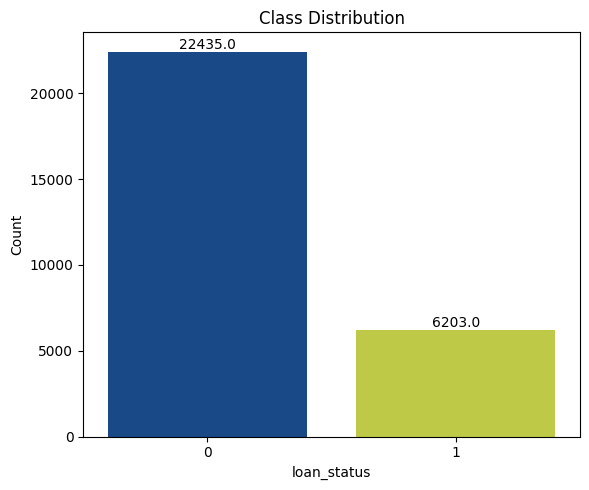

In [31]:

plt.figure(figsize=(6, 5))
ax = sns.countplot(x='loan_status', data=df, palette=["#074799", "#D2DE32"])
plt.title("Class Distribution")
plt.xlabel("loan_status")
plt.ylabel("Count")

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

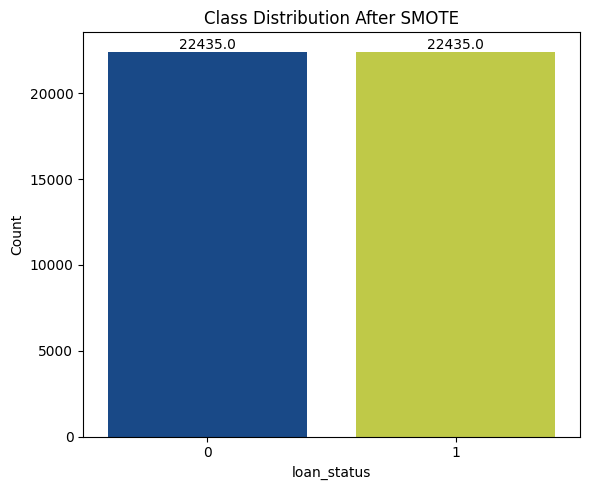

In [32]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Label encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col].astype(str))

# Separate features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# ✅ Save column names BEFORE scaling
feature_names = X.columns

# Normalize only features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# ✅ Convert back to DataFrame using saved column names
df_resampled = pd.DataFrame(X_resampled, columns=feature_names)
df_resampled['loan_status'] = y_resampled

# Plot class distribution
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='loan_status', data=df_resampled, palette=["#074799", "#D2DE32"])
plt.title("Class Distribution After SMOTE")
plt.xlabel("loan_status")
plt.ylabel("Count")

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**Model Train**


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6759
           1       0.98      0.91      0.94      6702

    accuracy                           0.95     13461
   macro avg       0.95      0.95      0.95     13461
weighted avg       0.95      0.95      0.95     13461

Accuracy: 0.9463


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6759
           1       0.96      0.74      0.83      6702

    accuracy                           0.85     13461
   macro avg       0.87      0.85      0.85     13461
weighted avg       0.87      0.85      0.85     13461

Accuracy: 0.8525


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      6759
           1       0.78      0.78      0.78      6702

    accuracy              

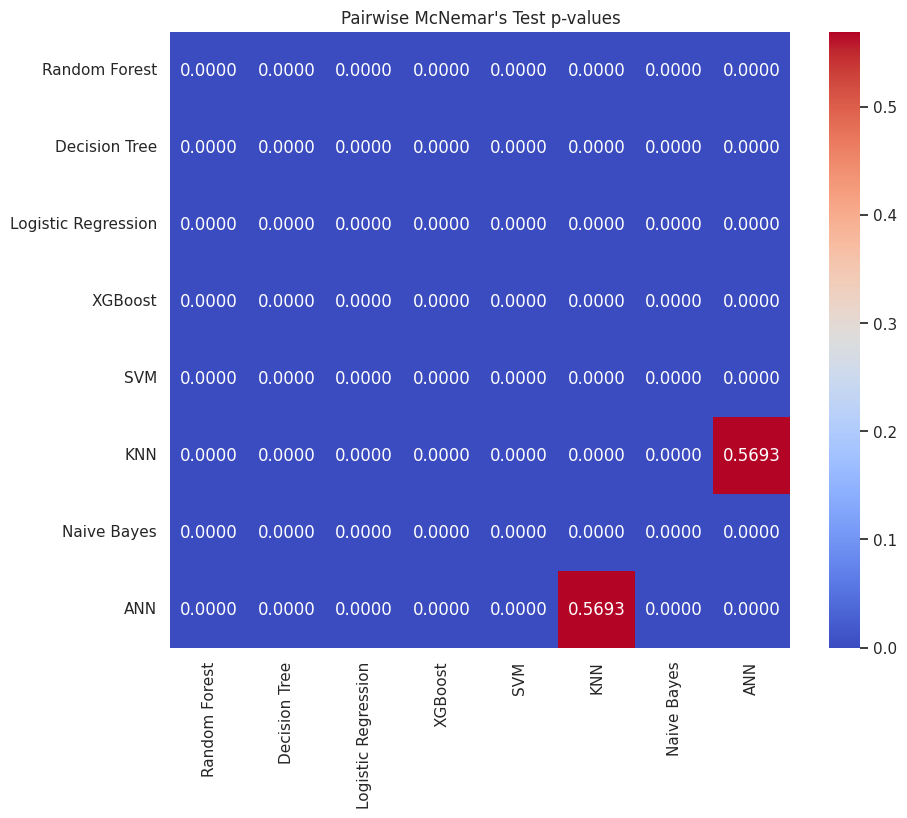

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import mcnemar_table, mcnemar
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Models (optimized)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial', random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=3, verbosity=0, n_jobs=-1, random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "ANN": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
}

# Train models and store predictions
results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }

# Print classification reports
for name, result in results.items():
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, predictions[name]))
    print(f"Accuracy: {result['accuracy']:.4f}\n")

# Statistical comparison using McNemar's test
print("\nStatistical Comparison (McNemar's Test):")
model_names = list(models.keys())
n_models = len(model_names)

# Create a matrix to store p-values
p_value_matrix = np.zeros((n_models, n_models))

for i in range(n_models):
    for j in range(i+1, n_models):
        model1 = model_names[i]
        model2 = model_names[j]

        # Create contingency table
        table = mcnemar_table(y_test, predictions[model1], predictions[model2])

        # Calculate McNemar's test
        chi2, p = mcnemar(table, exact=False)

        p_value_matrix[i, j] = p
        p_value_matrix[j, i] = p

        print(f"{model1} vs {model2}: p-value = {p:.4f}")

# You can also visualize the p-value matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(p_value_matrix, annot=True, fmt=".4f", cmap="coolwarm",
            xticklabels=model_names, yticklabels=model_names)
plt.title("Pairwise McNemar's Test p-values")
plt.show()




**Pairwise T-Test**

Pairwise t-test results:
Random Forest vs Decision Tree: t-stat = 351.4130, p-value = 0.0000
Random Forest vs Logistic Regression: t-stat = 447.4018, p-value = 0.0000
Random Forest vs XGBoost: t-stat = -58.2694, p-value = 0.0000
Random Forest vs SVM: t-stat = 379.3161, p-value = 0.0000
Random Forest vs KNN: t-stat = 212.4784, p-value = 0.0000
Random Forest vs Naive Bayes: t-stat = 437.6749, p-value = 0.0000
Random Forest vs ANN: t-stat = 314.3437, p-value = 0.0000
Decision Tree vs Logistic Regression: t-stat = 189.8523, p-value = 0.0000
Decision Tree vs XGBoost: t-stat = -419.2807, p-value = 0.0000
Decision Tree vs SVM: t-stat = 68.8359, p-value = 0.0000
Decision Tree vs KNN: t-stat = -46.8379, p-value = 0.0000
Decision Tree vs Naive Bayes: t-stat = 193.8177, p-value = 0.0000
Decision Tree vs ANN: t-stat = -60.5172, p-value = 0.0000
Logistic Regression vs XGBoost: t-stat = -460.1577, p-value = 0.0000
Logistic Regression vs SVM: t-stat = -181.9284, p-value = 0.0000
Logistic Regression v

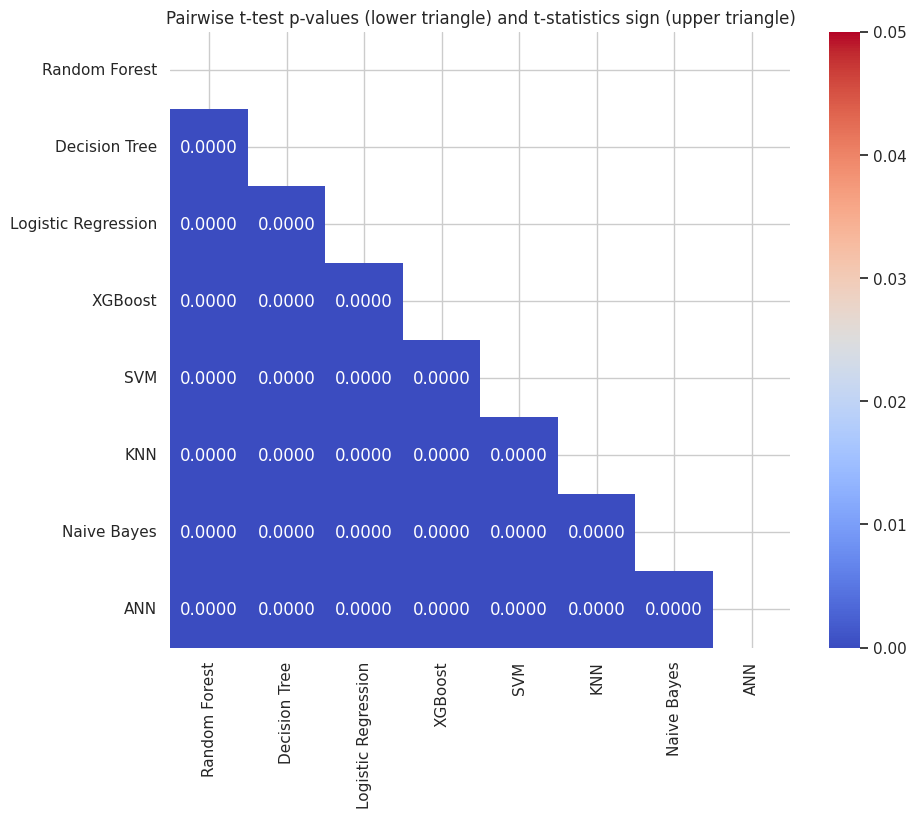


Model Performance Summary:
Random Forest: Mean Accuracy = 0.9462 (95% CI: [0.9425, 0.9498])
Decision Tree: Mean Accuracy = 0.8524 (95% CI: [0.8468, 0.8579])
Logistic Regression: Mean Accuracy = 0.7840 (95% CI: [0.7770, 0.7909])
XGBoost: Mean Accuracy = 0.9567 (95% CI: [0.9532, 0.9602])
SVM: Mean Accuracy = 0.8349 (95% CI: [0.8289, 0.8408])
KNN: Mean Accuracy = 0.8722 (95% CI: [0.8663, 0.8780])
Naive Bayes: Mean Accuracy = 0.7710 (95% CI: [0.7634, 0.7786])
ANN: Mean Accuracy = 0.8702 (95% CI: [0.8652, 0.8751])


In [ ]:
import numpy as np
from scipy.stats import ttest_rel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare accuracy scores for each model across multiple runs with bootstrappin
n_iterations = 100
bootstrap_results = {name: [] for name in models.keys()}

# Perform bootstrapping to get multiple accuracy measurements
for _ in range(n_iterations):
    # Create bootstrap sample (with replacement)
    indices = np.random.choice(len(y_test), size=len(y_test), replace=True)
    y_test_sample = y_test.iloc[indices]

    for name in models.keys():
        y_pred_sample = predictions[name][indices]
        acc = accuracy_score(y_test_sample, y_pred_sample)
        bootstrap_results[name].append(acc)

# Convert to DataFrame for easier handling
acc_df = pd.DataFrame(bootstrap_results)

# Perform pairwise t-tests
model_names = list(models.keys())
n_models = len(model_names)
t_test_matrix = np.zeros((n_models, n_models))
p_value_matrix = np.zeros((n_models, n_models))

print("Pairwise t-test results:")
for i in range(n_models):
    for j in range(i+1, n_models):
        model1 = model_names[i]
        model2 = model_names[j]

        # Perform paired t-test
        t_stat, p_value = ttest_rel(acc_df[model1], acc_df[model2])

        t_test_matrix[i, j] = t_stat
        t_test_matrix[j, i] = -t_stat
        p_value_matrix[i, j] = p_value
        p_value_matrix[j, i] = p_value

        print(f"{model1} vs {model2}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

# Create a DataFrame for the p-values
p_value_df = pd.DataFrame(p_value_matrix, index=model_names, columns=model_names)

# Visualize the p-value matrix
plt.figure(figsize=(10, 8))
sns.heatmap(p_value_df, annot=True, fmt=".4f", cmap="coolwarm",
            mask=np.triu(np.ones_like(p_value_df)), vmin=0, vmax=0.05)
plt.title("Pairwise t-test p-values (lower triangle) and t-statistics sign (upper triangle)")
plt.show()

# Print mean accuracies with confidence intervals
print("\nModel Performance Summary:")
for name in models.keys():
    mean_acc = np.mean(acc_df[name])
    std_acc = np.std(acc_df[name])
    ci_low = mean_acc - 1.96 * std_acc
    ci_high = mean_acc + 1.96 * std_acc
    print(f"{name}: Mean Accuracy = {mean_acc:.4f} (95% CI: [{ci_low:.4f}, {ci_high:.4f}])")

**Individual t-tests**

Individual t-tests comparing against random chance (0.5):
Random Forest: t-stat = 2392.0073, p-value = 0.0000
Decision Tree: t-stat = 1233.6242, p-value = 0.0000
Logistic Regression: t-stat = 795.9104, p-value = 0.0000
XGBoost: t-stat = 2562.3465, p-value = 0.0000
SVM: t-stat = 1104.0905, p-value = 0.0000
KNN: t-stat = 1245.5724, p-value = 0.0000
Naive Bayes: t-stat = 694.2761, p-value = 0.0000
ANN: t-stat = 1450.3568, p-value = 0.0000

Individual t-tests comparing against median accuracy (0.8606):
Random Forest: t-stat = 458.5077, p-value = 0.0000
Decision Tree: t-stat = -28.9179, p-value = 0.0000
Logistic Regression: t-stat = -214.9251, p-value = 0.0000
XGBoost: t-stat = 538.9895, p-value = 0.0000
SVM: t-stat = -84.9828, p-value = 0.0000
KNN: t-stat = 38.5973, p-value = 0.0000
Naive Bayes: t-stat = -229.6022, p-value = 0.0000
ANN: t-stat = 37.3248, p-value = 0.0000

Individual t-tests comparing against threshold (0.8000):
Random Forest: t-stat = 783.5921, p-value = 0.0000
Decision Tr

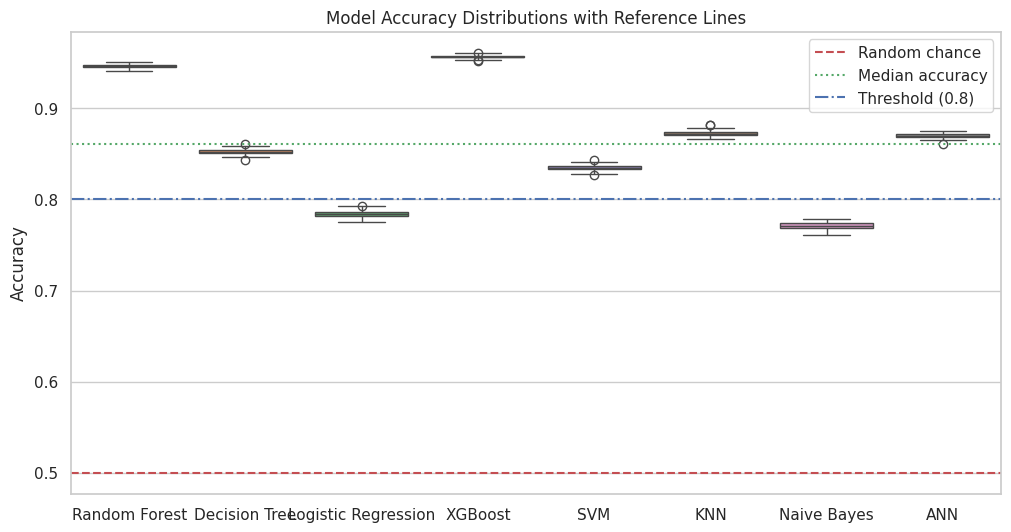

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp
import pandas as pd

# Using the same bootstrap results from previous code
acc_df = pd.DataFrame(bootstrap_results)  # From the previous cell

# Option 1: Compare against random chance
# Calculate random chance accuracy (for balanced classes)
n_classes = len(np.unique(y_test))
random_chance = 1/n_classes

print("Individual t-tests comparing against random chance ({}):".format(random_chance))
for name in models.keys():
    t_stat, p_value = ttest_1samp(acc_df[name], popmean=random_chance)
    print(f"{name}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

# Option 2: Compare against median accuracy of all models
median_acc = np.median(acc_df.values)
print("\nIndividual t-tests comparing against median accuracy ({:.4f}):".format(median_acc))
for name in models.keys():
    t_stat, p_value = ttest_1samp(acc_df[name], popmean=median_acc)
    print(f"{name}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

# Option 3: Compare against a specific threshold (e.g., 0.8)
threshold = 0.8
print("\nIndividual t-tests comparing against threshold ({:.4f}):".format(threshold))
for name in models.keys():
    t_stat, p_value = ttest_1samp(acc_df[name], popmean=threshold)
    print(f"{name}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

# Visualize the results with confidence intervals
plt.figure(figsize=(12, 6))
sns.boxplot(data=acc_df)
plt.axhline(y=random_chance, color='r', linestyle='--', label='Random chance')
plt.axhline(y=median_acc, color='g', linestyle=':', label='Median accuracy')
plt.axhline(y=threshold, color='b', linestyle='-.', label=f'Threshold ({threshold})')
plt.title('Model Accuracy Distributions with Reference Lines')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

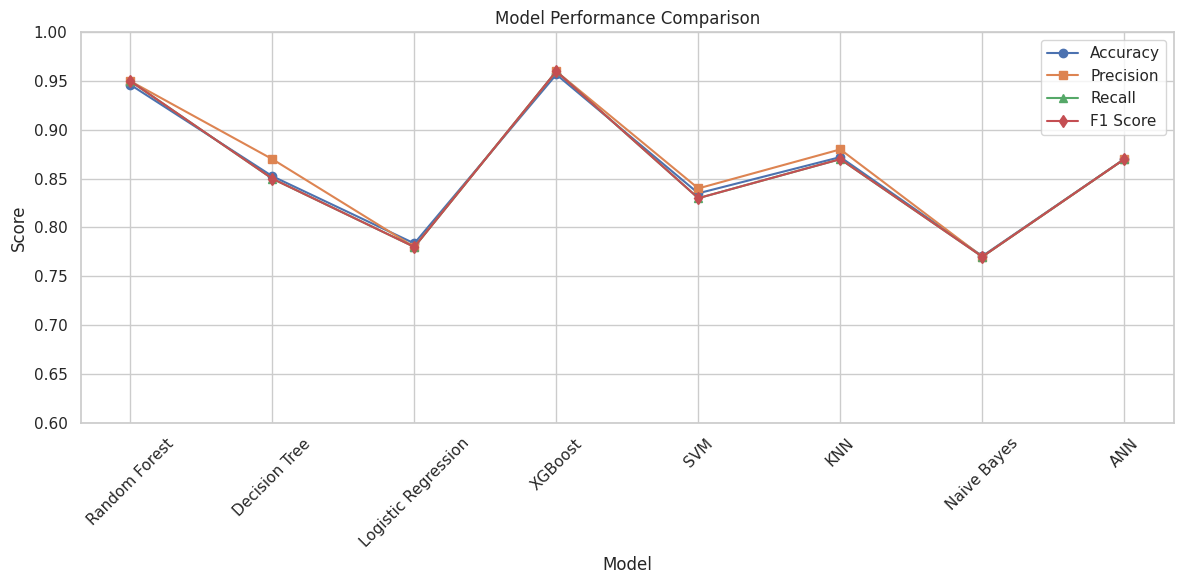

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics for each model based on the provided classification reports
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost',
          'SVM', 'KNN', 'Naive Bayes', 'ANN']

accuracy = [0.9463, 0.8525, 0.7836, 0.9568, 0.8350, 0.8721, 0.7706, 0.8701]
precision = [0.95, 0.87, 0.78, 0.96, 0.84, 0.88, 0.77, 0.87]
recall = [0.95, 0.85, 0.78, 0.96, 0.83, 0.87, 0.77, 0.87]
f1_score = [0.95, 0.85, 0.78, 0.96, 0.83, 0.87, 0.77, 0.87]

# Plotting the metrics
plt.figure(figsize=(12, 6))
plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, precision, marker='s', label='Precision')
plt.plot(models, recall, marker='^', label='Recall')
plt.plot(models, f1_score, marker='d', label='F1 Score')

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.6, 1.0)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b86e47dac8e406b767d1dcd9a549281331be6916cb2af89706e07d9b39d769e3
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


**SHAP**

100%|===================| 28627/28638 [02:09<00:00]       

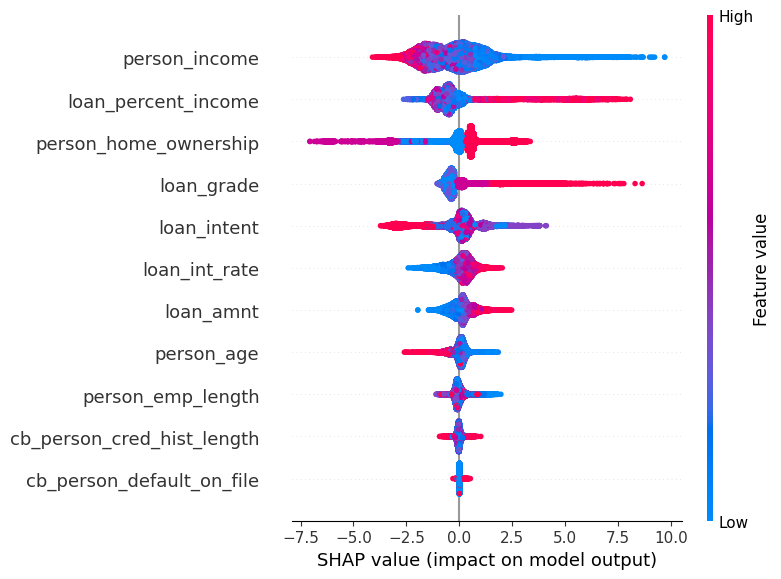

In [ ]:
import shap
import xgboost as xgb

# Train your model if not already trained
xgb_model = XGBClassifier()
xgb_model.fit(X, y)

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model, X)
shap_values = explainer(X)

# Summary Plot (feature importance)
shap.summary_plot(shap_values, X)




**LIME**

In [ ]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    mode='classification'
)

# Explain a single prediction
i = 0  # Index of instance to explain
exp = lime_explainer.explain_instance(X.iloc[i].values, xgb_model.predict_proba, num_features=10)

# Show explanation
exp.show_in_notebook(show_table=True)


In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'Record_Hash'],
      dtype='object')

SHA-256 Hashing and Merkle Tree

24777    b111ea351e31fb095cfba0094f69a1f54c3a8f97993cb3...
18341    ad0d22d15d62d74927bc490300de09f92c464d44819b5a...
14584    3bfe20958d6a1288486ede2aa556cb57b17524483c57bf...
23814    88d510067d5a59efbe9659ee1efaded8f2d18a75f51054...
20906    3eede9539bbc0a72f8215bcf17f95a151f2074c04f5aae...
dtype: object


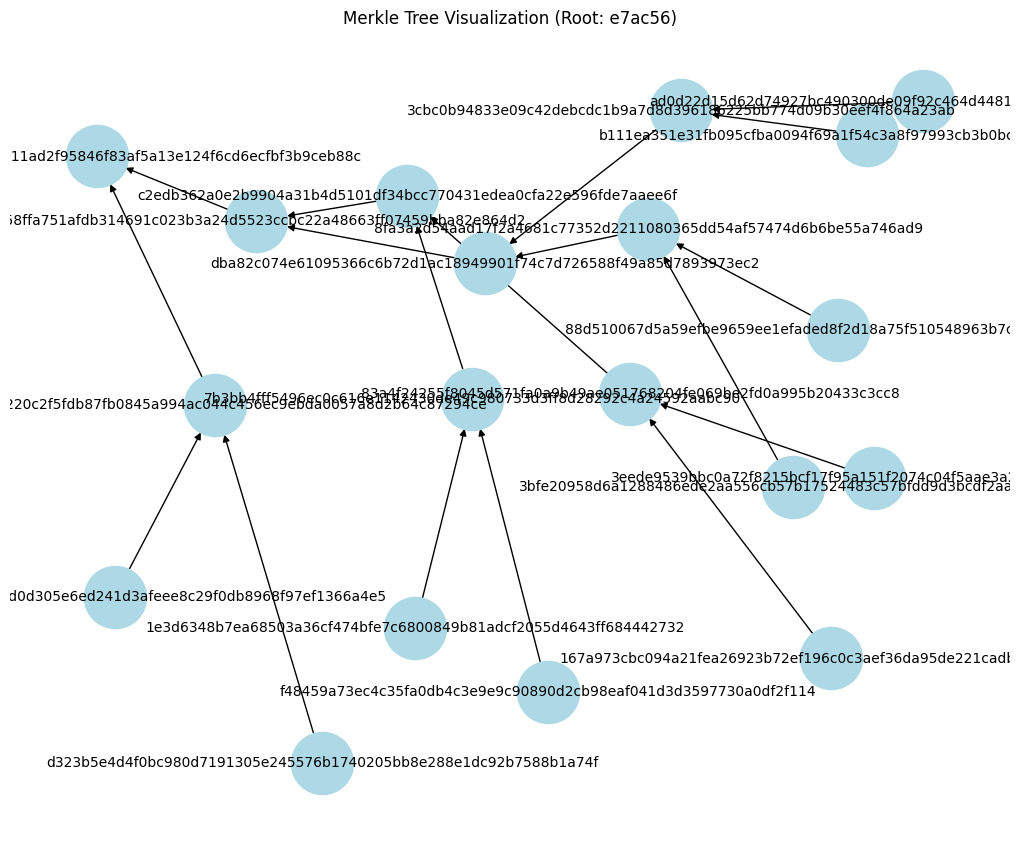

In [ ]:
#Hash Individual Records

import hashlib
import pandas as pd

def hash_record(record):
    """Convert a single record (row) into a SHA-256 hash string."""
    record_str = ''.join(map(str, record))
    return hashlib.sha256(record_str.encode()).hexdigest()

# only want to hash input features
records_to_hash = df.drop(columns='loan_status', errors='ignore')

# Apply hash to each row
df['Record_Hash'] = records_to_hash.apply(hash_record, axis=1)


#Merkle Tree Implementation
def build_merkle_tree(hashes):
    """Build a Merkle Tree from a list of leaf hashes and return the Merkle Root."""
    if len(hashes) == 0:
        return None
    while len(hashes) > 1:
        if len(hashes) % 2 == 1:  # duplicate last hash if odd number
            hashes.append(hashes[-1])
        new_level = []
        for i in range(0, len(hashes), 2):
            combined = hashes[i] + hashes[i + 1]
            new_hash = hashlib.sha256(combined.encode()).hexdigest()
            new_level.append(new_hash)
        hashes = new_level
    return hashes[0]




#Blockchain Block + Chain Creation

import time

class Block:
    def __init__(self, index, merkle_root, previous_hash):
        self.index = index
        self.timestamp = time.time()
        self.merkle_root = merkle_root
        self.previous_hash = previous_hash
        self.hash = self.compute_hash()

    def compute_hash(self):
        block_string = f'{self.index}{self.timestamp}{self.merkle_root}{self.previous_hash}'
        return hashlib.sha256(block_string.encode()).hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_genesis_block()

    def create_genesis_block(self):
        genesis_block = Block(0, "Genesis Root", "0")
        self.chain.append(genesis_block)

    def add_block(self, merkle_root):
        prev_block = self.chain[-1]
        new_block = Block(len(self.chain), merkle_root, prev_block.hash)
        self.chain.append(new_block)




#Hashing & Building Blockchain with Merkle Roots

# Group 10 records per block
blockchain = Blockchain()
batch_size = 10

for start in range(0, len(df), batch_size):
    end = min(start + batch_size, len(df))
    batch_hashes = df['Record_Hash'].iloc[start:end].tolist()
    merkle_root = build_merkle_tree(batch_hashes)
    blockchain.add_block(merkle_root)



#Graph representation of a Merkle Tree

import networkx as nx
import matplotlib.pyplot as plt
import hashlib
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df_sample = df.sample(n=10, random_state=42)

# Select columns for hashing
df_records = df_sample[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

# Convert column names to lowercase
df_records.columns = df_records.columns.str.lower()

# Display the updated dataframe with lowercase column names
df_records.head()

# Hash each record in the dataset
hashed_records = df_records.apply(lambda row: hashlib.sha256(str(row.values).encode()).hexdigest(), axis=1)

# Let's print the first few hashes
print(hashed_records.head())

# Convert to a list of hashes
sample_hashes = hashed_records.tolist()

def create_merkle_tree_graph(hashes):
    """Create a graph representation of a Merkle Tree."""
    G = nx.DiGraph()
    level = 0
    nodes = hashes

    while len(nodes) > 1:
        level += 1
        new_nodes = []
        for i in range(0, len(nodes) - 1, 2):
            combined = nodes[i] + nodes[i + 1]
            parent_hash = hashlib.sha256(combined.encode()).hexdigest()
            new_nodes.append(parent_hash)
            G.add_edge(nodes[i], parent_hash)
            G.add_edge(nodes[i + 1], parent_hash)

        # If odd number of nodes, carry over the last node
        if len(nodes) % 2 == 1:
            new_nodes.append(nodes[-1])

        nodes = new_nodes

    return G, nodes[0]  # Final root node

# Create Merkle tree graph and get root
G, root = create_merkle_tree_graph(sample_hashes)

# Draw the graph (Merkle Tree)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
plt.title("Merkle Tree Visualization (Root: {})".format(root[:6]))
plt.show()


Visualizing the Blockchain Structure


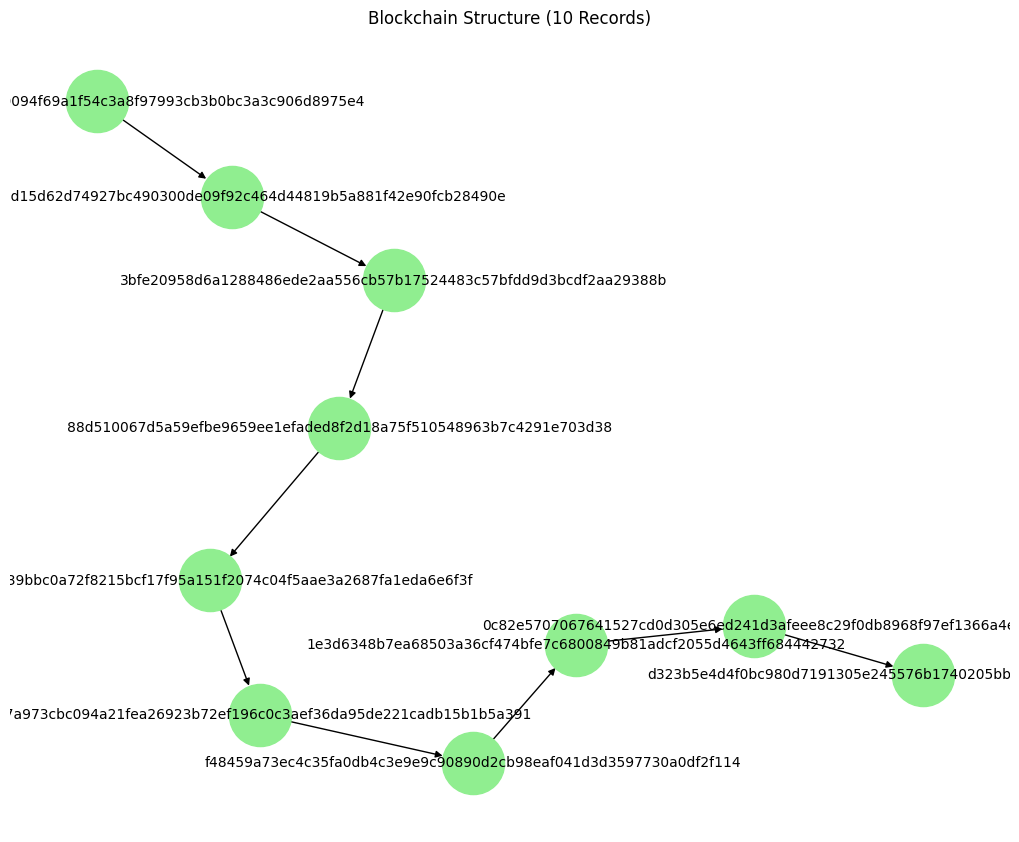

In [ ]:

# Convert to a list of hashes
sample_hashes = hashed_records.tolist()

def create_blockchain_graph(hashes):
    """Create a graph representation of a blockchain structure."""
    G = nx.DiGraph()

    # Create blocks by linking each hash to the next one
    for i in range(len(hashes) - 1):
        G.add_edge(hashes[i], hashes[i + 1])

    return G

# Create the blockchain graph
G_blockchain = create_blockchain_graph(sample_hashes)

# Draw the blockchain graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_blockchain, seed=42)
nx.draw(G_blockchain, pos, with_labels=True, node_size=2000, node_color="lightgreen", font_size=10, edge_color="black")
plt.title("Blockchain Structure (10 Records)")
plt.show()


# **ZKP Merkle Tree**


Performance Metrics:
Average Proof Generation Time: 0.01s
Average Verification Time: 0.01s
Average Proof Size: 13.00 bytes


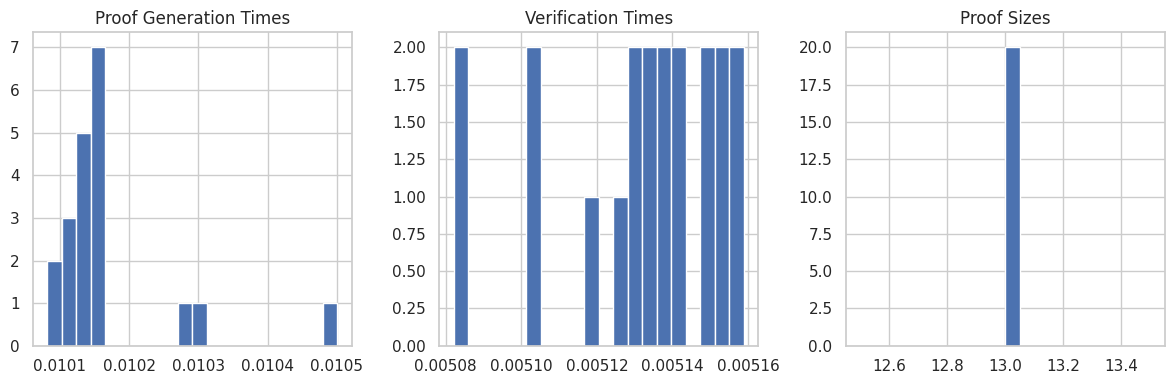

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# --- 2. Train ML Model ---
model = XGBClassifier(n_estimators=50)
model.fit(X, y)

# --- 3. Simulated ZKP Credit Prover ---
class ZKPCreditProver:
    def __init__(self, model):
        self.model = model
        self.performance_metrics = {
            'proof_times': [],
            'verification_times': [],
            'proof_sizes': []
        }

    def prove_creditworthiness(self, age, income, emp_length, cred_hist):
        """Simulate a ZKP for creditworthiness"""
        start = time.time()
        # Simulated eligibility rule: income > 30k, emp_length > 1 yr, cred_hist > 2 yrs
        passed = income > 30000 and emp_length > 1 and cred_hist > 2
        time.sleep(0.01)  # Simulate proof generation time
        proof = "valid_proof" if passed else "invalid_proof"
        return proof, time.time() - start

    def generate_proof(self, applicant_data):
        """Generate and measure simulated ZKP proof"""
        proof, proof_time = self.prove_creditworthiness(
            age=applicant_data['person_age'],
            income=applicant_data['person_income'],
            emp_length=applicant_data['person_emp_length'],
            cred_hist=applicant_data['cb_person_cred_hist_length']
        )
        proof_size = len(proof.encode('utf-8'))

        self.performance_metrics['proof_times'].append(proof_time)
        self.performance_metrics['proof_sizes'].append(proof_size)

        return proof, proof_time, proof_size

    def verify_proof(self, proof):
        """Simulate verification timing"""
        start_time = time.time()
        time.sleep(0.005)  # Simulate verification delay
        verification_time = time.time() - start_time
        self.performance_metrics['verification_times'].append(verification_time)
        return verification_time

    def analyze_performance(self):
        """Generate performance metrics and visualizations"""
        avg_proof_time = np.mean(self.performance_metrics['proof_times'])
        avg_verify_time = np.mean(self.performance_metrics['verification_times'])
        avg_proof_size = np.mean(self.performance_metrics['proof_sizes'])

        print(f"\nPerformance Metrics:")
        print(f"Average Proof Generation Time: {avg_proof_time:.2f}s")
        print(f"Average Verification Time: {avg_verify_time:.2f}s")
        print(f"Average Proof Size: {avg_proof_size:.2f} bytes")

        # Visualization
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.hist(self.performance_metrics['proof_times'], bins=20)
        plt.title("Proof Generation Times")

        plt.subplot(1, 3, 2)
        plt.hist(self.performance_metrics['verification_times'], bins=20)
        plt.title("Verification Times")

        plt.subplot(1, 3, 3)
        plt.hist(self.performance_metrics['proof_sizes'], bins=20)
        plt.title("Proof Sizes")
        plt.tight_layout()
        plt.show()

# --- 4. Usage Example ---
zkp = ZKPCreditProver(model)

# Simulate applicant evaluation (you can loop over a real dataset)
for i in range(20):
    sample = X.iloc[i].to_dict()
    proof, p_time, p_size = zkp.generate_proof(sample)
    v_time = zkp.verify_proof(proof)

zkp.analyze_performance()


Running ZKP Credit Verification with Pure Python Merkle Tree...

Performance Metrics:
Average Proof Generation Time: 0.01s
Average Verification Time: nans
Average Proof Size: 11.86 bytes


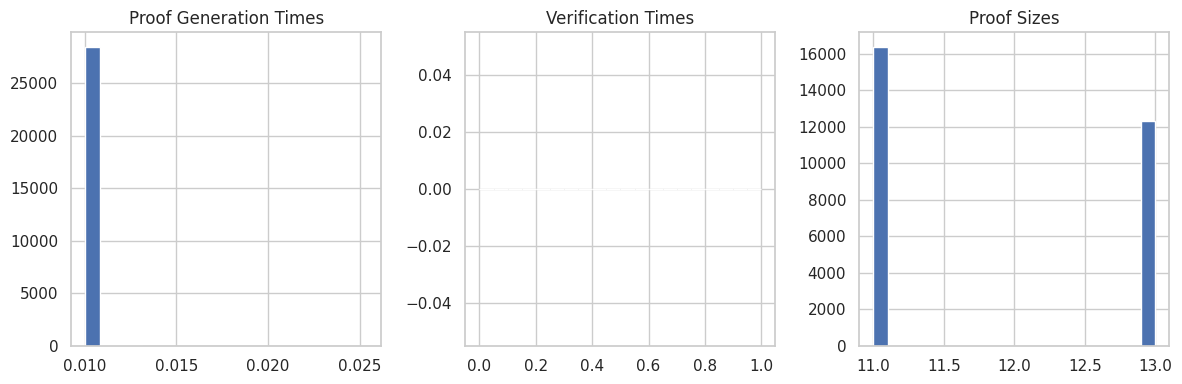


Sample Verification for Applicant 10:
Merkle Proof Length: 15 steps
Verification Time: 0.0051s

First 5 Performance Records:
   applicant_id  proof_time  proof_size  \
0             0    0.010086          11   
1             1    0.010090          13   
2             2    0.010095          13   
3             3    0.010088          13   
4             4    0.010089          11   

                                           data_hash  
0  2246c2c8b45a2639fb49866a5c5346201f31381ffcb709...  
1  a2d7f6e7ad8b01d93d01c5c225649a96c4787f3aa601f0...  
2  7e38201a6e9b3c3b4d898044913493d30790c3e497332f...  
3  1c003e77a0280407b3a85396ac537d13353311cc6a9fe9...  
4  8133f2b88f1ba72a9299af860af3ecedac7c4cd51db901...  


In [ ]:
from hashlib import sha256
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

df = pd.read_csv('/content/credit_risk_dataset.csv')
df.dropna(inplace=True)


# ------------------------------
# Pure Python Merkle Tree
# ------------------------------
class MerkleTree:
    def __init__(self):
        self.leaves = []

    def add_leaf(self, data_hash):
        self.leaves.append(data_hash)

    def build_tree(self):
        nodes = self.leaves.copy()
        if not nodes:
            self.root = None
            return
        while len(nodes) > 1:
            temp = []
            for i in range(0, len(nodes), 2):
                left = nodes[i]
                right = nodes[i+1] if i+1 < len(nodes) else left
                temp.append(self._hash_pair(left, right))
            nodes = temp
        self.root = nodes[0]

    def _hash_pair(self, left, right):
        return sha256((left + right).encode()).hexdigest()

    def get_proof(self, index):
        proof = []
        idx = index
        nodes = self.leaves.copy()
        while len(nodes) > 1:
            temp = []
            for i in range(0, len(nodes), 2):
                left = nodes[i]
                right = nodes[i+1] if i+1 < len(nodes) else left
                pair_hash = self._hash_pair(left, right)
                temp.append(pair_hash)

                if i == idx or i+1 == idx:
                    sibling = right if i == idx else left
                    proof.append(sibling)
                    idx = len(temp) - 1
            nodes = temp
        return proof

# ------------------------------
# Integration with Merkle Tree
# ------------------------------
class MeasurableZKPMerkleTree:
    def __init__(self, model):
        self.zkp_prover = ZKPCreditProver(model)
        self.mt = MerkleTree()
        self.performance_data = []

    def add_applicant(self, data):
        sensitive_data = {
            'income': data['person_income'],
            'age': data['person_age'],
            'emp_length': data['person_emp_length'],
            'cred_hist': data['cb_person_cred_hist_length']
        }
        data_hash = sha256(str(sensitive_data).encode()).hexdigest()
        self.mt.add_leaf(data_hash)
        self.mt.build_tree()

        proof, proof_time, proof_size = self.zkp_prover.generate_proof(data)

        self.performance_data.append({
            'applicant_id': len(self.mt.leaves) - 1,
            'proof_time': proof_time,
            'proof_size': proof_size,
            'data_hash': data_hash
        })

    def verify_applicant(self, applicant_id):
        merkle_proof = self.mt.get_proof(applicant_id)
        verify_time = self.zkp_prover.verify_proof("proof:1")
        return {
            'merkle_proof': merkle_proof,
            'verify_time': verify_time
        }

    def get_performance_report(self):
        return pd.DataFrame(self.performance_data)

# ------------------------------
# Run Full Workflow
# ------------------------------
print("Running ZKP Credit Verification with Pure Python Merkle Tree...")

zkp_merkle = MeasurableZKPMerkleTree(model)

for _, row in df.iterrows():
    zkp_merkle.add_applicant(row.to_dict())

zkp_merkle.zkp_prover.analyze_performance()

sample_id = 10
verification_result = zkp_merkle.verify_applicant(sample_id)
print(f"\nSample Verification for Applicant {sample_id}:")
print(f"Merkle Proof Length: {len(verification_result['merkle_proof'])} steps")
print(f"Verification Time: {verification_result['verify_time']:.4f}s")

performance_df = zkp_merkle.get_performance_report()
print("\nFirst 5 Performance Records:")
print(performance_df.head())

In [ ]:
performance_df.head(10)

,applicant_id,proof_time,proof_size,data_hash
0,0,0.010086,11,2246c2c8b45a2639fb49866a5c5346201f31381ffcb709...
1,1,0.010090,13,a2d7f6e7ad8b01d93d01c5c225649a96c4787f3aa601f0...
2,2,0.010095,13,7e38201a6e9b3c3b4d898044913493d30790c3e497332f...
3,3,0.010088,13,1c003e77a0280407b3a85396ac537d13353311cc6a9fe9...
4,4,0.010089,11,8133f2b88f1ba72a9299af860af3ecedac7c4cd51db901...
5,5,0.010075,13,1dec53405602e9080eb08163c3b4d726eb6d4acdaf0dff...
6,6,0.010093,11,b64af21738e84083f11491f1ada3e55b5b2c8d2ae00e8c...
7,7,0.010101,11,f16e7f0ea5307c46c826466104ea5e4bc1797fa8680d2c...
8,8,0.010087,13,6746d586a2fcafa412bacf9280725fff971ae138928ae3...
9,9,0.010081,13,69d5fe0427f575e8c9f523596bcf671fe3994ea03eca46...


# **Without SMOTE**


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6715
           1       0.97      0.69      0.81      1877

    accuracy                           0.93      8592
   macro avg       0.94      0.84      0.88      8592
weighted avg       0.93      0.93      0.92      8592

Accuracy: 0.9274


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6715
           1       0.81      0.70      0.75      1877

    accuracy                           0.90      8592
   macro avg       0.86      0.83      0.84      8592
weighted avg       0.89      0.90      0.90      8592

Accuracy: 0.8982


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6715
           1       0.71      0.45      0.55      1877

    accuracy              

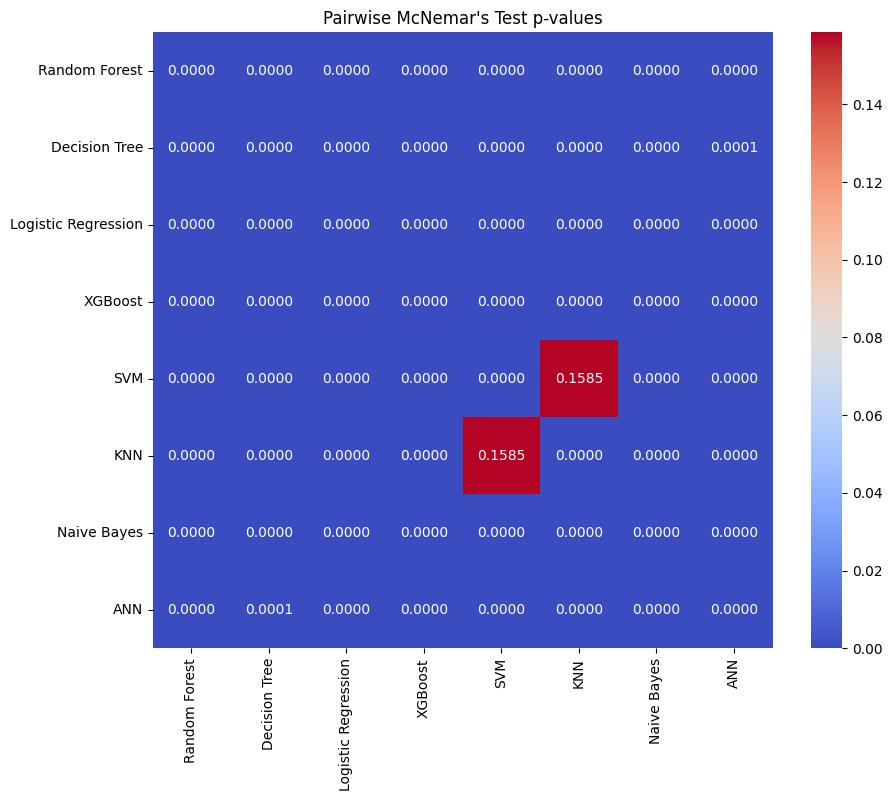

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import mcnemar_table, mcnemar
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/content/credit_risk_dataset.csv')
df.dropna(inplace=True)
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    if col != 'loan_status':
        df[col] = le.fit_transform(df[col].astype(str))
df['loan_status'] = le.fit_transform(df['loan_status'])

X = StandardScaler().fit_transform(df.drop("loan_status", axis=1))
y = df["loan_status"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models (optimized)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial', random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=3, verbosity=0, n_jobs=-1, random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "ANN": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
}

# Train models and store predictions
results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }

# Print classification reports
for name, result in results.items():
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, predictions[name]))
    print(f"Accuracy: {result['accuracy']:.4f}\n")

# Statistical comparison using McNemar's test
print("\nStatistical Comparison (McNemar's Test):")
model_names = list(models.keys())
n_models = len(model_names)

# Create a matrix to store p-values
p_value_matrix = np.zeros((n_models, n_models))

for i in range(n_models):
    for j in range(i+1, n_models):
        model1 = model_names[i]
        model2 = model_names[j]

        # Create contingency table
        table = mcnemar_table(y_test, predictions[model1], predictions[model2])

        # Calculate McNemar's test
        chi2, p = mcnemar(table, exact=False)

        p_value_matrix[i, j] = p
        p_value_matrix[j, i] = p

        print(f"{model1} vs {model2}: p-value = {p:.4f}")

# You can also visualize the p-value matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(p_value_matrix, annot=True, fmt=".4f", cmap="coolwarm",
            xticklabels=model_names, yticklabels=model_names)
plt.title("Pairwise McNemar's Test p-values")
plt.show()

Pairwise t-test results:
Random Forest vs Decision Tree: t-stat = 126.1692, p-value = 0.0000
Random Forest vs Logistic Regression: t-stat = 244.7303, p-value = 0.0000
Random Forest vs XGBoost: t-stat = -46.9862, p-value = 0.0000
Random Forest vs SVM: t-stat = 195.2486, p-value = 0.0000
Random Forest vs KNN: t-stat = 201.3517, p-value = 0.0000
Random Forest vs Naive Bayes: t-stat = 253.4574, p-value = 0.0000
Random Forest vs ANN: t-stat = 84.5166, p-value = 0.0000
Decision Tree vs Logistic Regression: t-stat = 154.4739, p-value = 0.0000
Decision Tree vs XGBoost: t-stat = -156.6195, p-value = 0.0000
Decision Tree vs SVM: t-stat = 68.6287, p-value = 0.0000
Decision Tree vs KNN: t-stat = 80.4092, p-value = 0.0000
Decision Tree vs Naive Bayes: t-stat = 215.8045, p-value = 0.0000
Decision Tree vs ANN: t-stat = -35.5498, p-value = 0.0000
Logistic Regression vs XGBoost: t-stat = -259.9614, p-value = 0.0000
Logistic Regression vs SVM: t-stat = -123.4714, p-value = 0.0000
Logistic Regression vs 

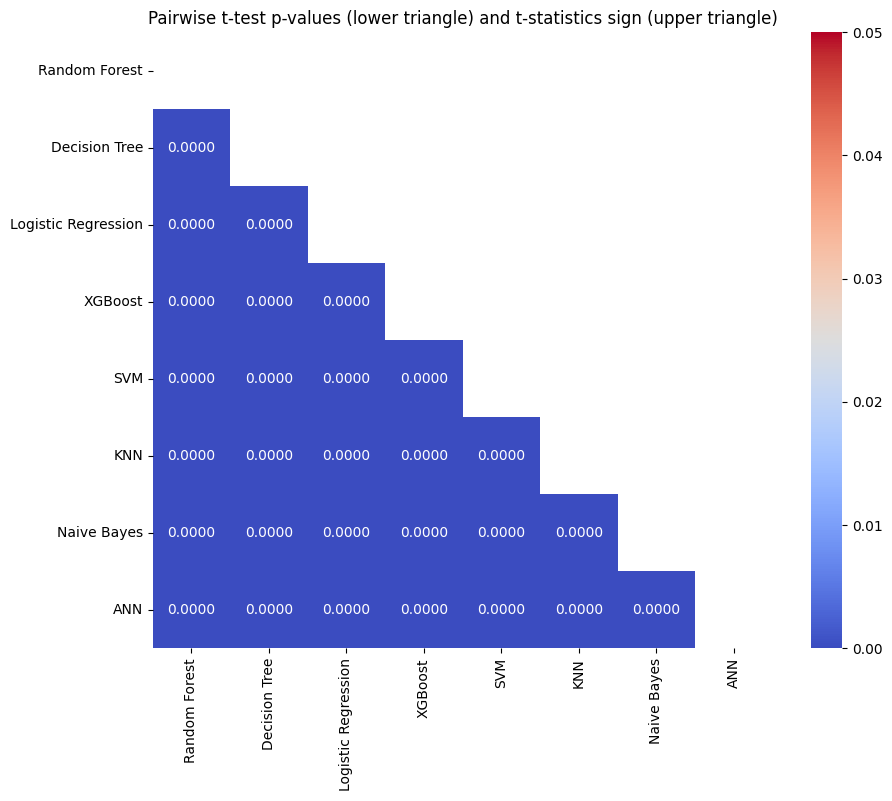


Model Performance Summary:
Random Forest: Mean Accuracy = 0.9274 (95% CI: [0.9214, 0.9335])
Decision Tree: Mean Accuracy = 0.8981 (95% CI: [0.8913, 0.9050])
Logistic Regression: Mean Accuracy = 0.8410 (95% CI: [0.8330, 0.8490])
XGBoost: Mean Accuracy = 0.9343 (95% CI: [0.9286, 0.9401])
SVM: Mean Accuracy = 0.8778 (95% CI: [0.8708, 0.8847])
KNN: Mean Accuracy = 0.8739 (95% CI: [0.8670, 0.8808])
Naive Bayes: Mean Accuracy = 0.7971 (95% CI: [0.7879, 0.8064])
ANN: Mean Accuracy = 0.9088 (95% CI: [0.9027, 0.9149])


In [ ]:
import numpy as np
from scipy.stats import ttest_rel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare accuracy scores for each model across multiple runs (we'll use bootstrapping)
n_iterations = 100  # Number of bootstrap samples
bootstrap_results = {name: [] for name in models.keys()}

# Perform bootstrapping to get multiple accuracy measurements
for _ in range(n_iterations):
    # Create bootstrap sample (with replacement)
    indices = np.random.choice(len(y_test), size=len(y_test), replace=True)
    y_test_sample = y_test.iloc[indices]

    for name in models.keys():
        y_pred_sample = predictions[name][indices]
        acc = accuracy_score(y_test_sample, y_pred_sample)
        bootstrap_results[name].append(acc)

# Convert to DataFrame for easier handling
acc_df = pd.DataFrame(bootstrap_results)

# Perform pairwise t-tests
model_names = list(models.keys())
n_models = len(model_names)
t_test_matrix = np.zeros((n_models, n_models))
p_value_matrix = np.zeros((n_models, n_models))

print("Pairwise t-test results:")
for i in range(n_models):
    for j in range(i+1, n_models):
        model1 = model_names[i]
        model2 = model_names[j]

        # Perform paired t-test
        t_stat, p_value = ttest_rel(acc_df[model1], acc_df[model2])

        t_test_matrix[i, j] = t_stat
        t_test_matrix[j, i] = -t_stat
        p_value_matrix[i, j] = p_value
        p_value_matrix[j, i] = p_value

        print(f"{model1} vs {model2}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

# Create a DataFrame for the p-values
p_value_df = pd.DataFrame(p_value_matrix, index=model_names, columns=model_names)

# Visualize the p-value matrix
plt.figure(figsize=(10, 8))
sns.heatmap(p_value_df, annot=True, fmt=".4f", cmap="coolwarm",
            mask=np.triu(np.ones_like(p_value_df)), vmin=0, vmax=0.05)
plt.title("Pairwise t-test p-values (lower triangle) and t-statistics sign (upper triangle)")
plt.show()

# Print mean accuracies with confidence intervals
print("\nModel Performance Summary:")
for name in models.keys():
    mean_acc = np.mean(acc_df[name])
    std_acc = np.std(acc_df[name])
    ci_low = mean_acc - 1.96 * std_acc
    ci_high = mean_acc + 1.96 * std_acc
    print(f"{name}: Mean Accuracy = {mean_acc:.4f} (95% CI: [{ci_low:.4f}, {ci_high:.4f}])")

Individual t-tests comparing against random chance (0.5):
Random Forest: t-stat = 1382.0864, p-value = 0.0000
Decision Tree: t-stat = 1137.2708, p-value = 0.0000
Logistic Regression: t-stat = 832.7784, p-value = 0.0000
XGBoost: t-stat = 1480.3919, p-value = 0.0000
SVM: t-stat = 1056.5748, p-value = 0.0000
KNN: t-stat = 1060.2439, p-value = 0.0000
Naive Bayes: t-stat = 624.4919, p-value = 0.0000
ANN: t-stat = 1307.3329, p-value = 0.0000

Individual t-tests comparing against median accuracy (0.8878):
Random Forest: t-stat = 128.1076, p-value = 0.0000
Decision Tree: t-stat = 29.4834, p-value = 0.0000
Logistic Regression: t-stat = -114.3941, p-value = 0.0000
XGBoost: t-stat = 158.5922, p-value = 0.0000
SVM: t-stat = -28.1133, p-value = 0.0000
KNN: t-stat = -39.3607, p-value = 0.0000
Naive Bayes: t-stat = -190.5360, p-value = 0.0000
ANN: t-stat = 67.2305, p-value = 0.0000

Individual t-tests comparing against threshold (0.8000):
Random Forest: t-stat = 412.0216, p-value = 0.0000
Decision Tr

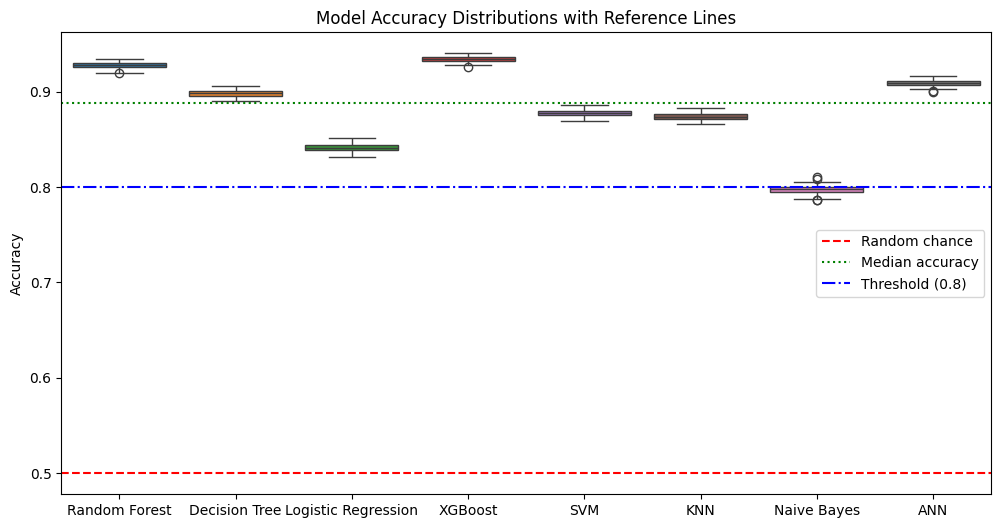

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp
import pandas as pd

# Using the same bootstrap results from previous code
acc_df = pd.DataFrame(bootstrap_results)  # From the previous cell

# Option 1: Compare against random chance
# Calculate random chance accuracy (for balanced classes)
n_classes = len(np.unique(y_test))
random_chance = 1/n_classes

print("Individual t-tests comparing against random chance ({}):".format(random_chance))
for name in models.keys():
    t_stat, p_value = ttest_1samp(acc_df[name], popmean=random_chance)
    print(f"{name}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

# Option 2: Compare against median accuracy of all models
median_acc = np.median(acc_df.values)
print("\nIndividual t-tests comparing against median accuracy ({:.4f}):".format(median_acc))
for name in models.keys():
    t_stat, p_value = ttest_1samp(acc_df[name], popmean=median_acc)
    print(f"{name}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

# Option 3: Compare against a specific threshold (e.g., 0.8)
threshold = 0.8
print("\nIndividual t-tests comparing against threshold ({:.4f}):".format(threshold))
for name in models.keys():
    t_stat, p_value = ttest_1samp(acc_df[name], popmean=threshold)
    print(f"{name}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

# Visualize the results with confidence intervals
plt.figure(figsize=(12, 6))
sns.boxplot(data=acc_df)
plt.axhline(y=random_chance, color='r', linestyle='--', label='Random chance')
plt.axhline(y=median_acc, color='g', linestyle=':', label='Median accuracy')
plt.axhline(y=threshold, color='b', linestyle='-.', label=f'Threshold ({threshold})')
plt.title('Model Accuracy Distributions with Reference Lines')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

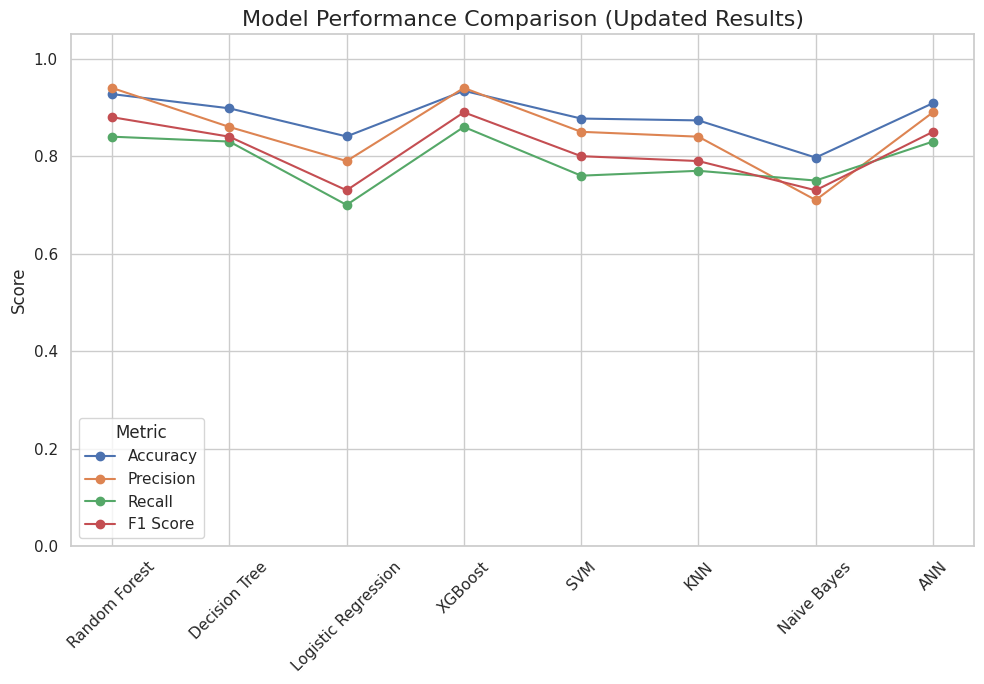

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Updated evaluation results
metrics_data = {
    'Model': [
        'Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost',
        'SVM', 'KNN', 'Naive Bayes', 'ANN'
    ],
    'Accuracy': [0.9274, 0.8982, 0.8405, 0.9341, 0.8772, 0.8734, 0.7971, 0.9088],
    'Precision': [0.94, 0.86, 0.79, 0.94, 0.85, 0.84, 0.71, 0.89],     # macro avg
    'Recall': [0.84, 0.83, 0.70, 0.86, 0.76, 0.77, 0.75, 0.83],        # macro avg
    'F1 Score': [0.88, 0.84, 0.73, 0.89, 0.80, 0.79, 0.73, 0.85]       # macro avg
}

# Convert to DataFrame
df = pd.DataFrame(metrics_data)

# Plotting as a line plot
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Plot each metric as a line
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(df['Model'], df[metric], marker='o', label=metric)

plt.title("Model Performance Comparison (Updated Results)", fontsize=16)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.grid(True)
plt.show()
